In [2]:
import matplotlib.pyplot as plt

# Random Numbers Generators

## Lehmers Generator

### Example 1

In [3]:
from BNumMet.Random import lehmers_rand

for i in range(10):
    print(lehmers_rand())

0.06852942006662488
0.34966174652799964
0.4812056985683739
0.7402784726582468
0.11081954883411527
0.0024110390804708004
0.0170902949757874
0.0808424181304872
0.3312418540008366
0.25986936083063483


### Example 2

In [4]:
from BNumMet.Random import lehmers_rand, clear_lehmers_vars

clear_lehmers_vars()
arr = [1]
for i in range(10):
    aux = lehmers_rand(a=2**16 + 3, m=2**31, c=0, x=arr[-1])
    if len(arr) >= 3:
        lehmerFormula = (6 * arr[-1] - 9 * arr[-2]) % 1  # Test Xn = (6Xn-1 - 9Xn-2)
        print(f"Lehmer's = {aux}\nPredicted = {lehmerFormula}\n")
    arr.append(aux)

Lehmer's = 0.0008239871822297573
Predicted = 0.0008239871822297573

Lehmer's = 0.003295936156064272
Predicted = 0.003295936156064272

Lehmer's = 0.012359732296317816
Predicted = 0.012359732296317816

Lehmer's = 0.04449496837332845
Predicted = 0.04449496837332845

Lehmer's = 0.15573221957311034
Predicted = 0.15573221957311034

Lehmer's = 0.533938602078706
Predicted = 0.533938602078706

Lehmer's = 0.8020416363142431
Predicted = 0.8020416363142431

Lehmer's = 0.006802399177104235
Predicted = 0.006802399177104235



### Example 3

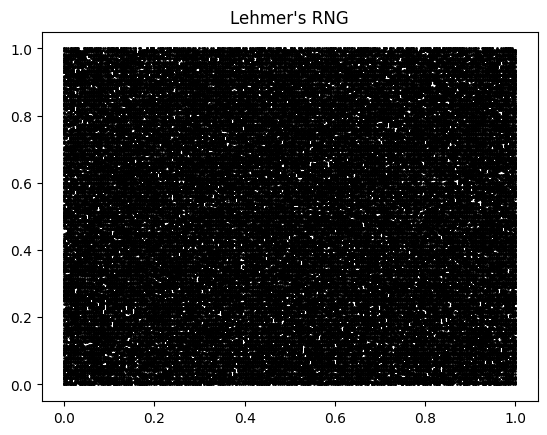

In [5]:
from BNumMet.Random import lehmers_rand, clear_lehmers_vars

clear_lehmers_vars()
fail2 = (
    lambda: float(
        (int(lehmers_rand(a=65539, c=0, m=2**31, x=123) * (2**31)) >> 23) & 0xFF
    )
    / 255
)
fail = [(fail2(), fail2()) for i in range(100000)]
plt.scatter(*zip(*fail), s=1, c="black")
plt.title("Lehmer's RNG")
plt.show()

## Marsaglia Generator

### Example 1

In [6]:
from BNumMet.Random import marsaglia_rand, clear_marsaglia_vars

clear_marsaglia_vars()
for i in range(10):
    print(marsaglia_rand(base=41, lag_r=2, lag_s=1, carry=0, seed_tuple=(0, 1)))

0.975609756097561
0.024390243902439025
0.926829268292683
0.0975609756097561
0.8048780487804879
0.2926829268292683
0.4878048780487805
0.8048780487804879
0.6585365853658537
0.12195121951219512


### Example 2

Text(0.5, 1.0, "Marsaglia's RNG Example 2")

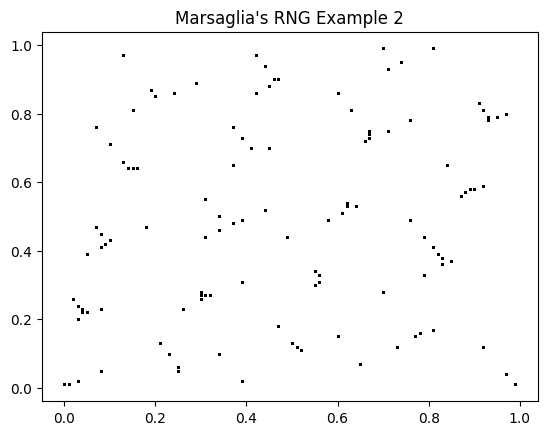

In [7]:
from BNumMet.Random import marsaglia_rand, clear_marsaglia_vars

clear_marsaglia_vars()
fail = [
    (
        marsaglia_rand(base=100, lag_r=2, lag_s=1, carry=0, seed_tuple=(0, 1)),
        marsaglia_rand(base=100, lag_r=2, lag_s=1, carry=0, seed_tuple=(0, 1)),
    )
    for i in range(100000)
]
plt.scatter(*zip(*fail), s=1, c="black")
plt.title("Marsaglia's RNG Example 2")
plt.show()

### Example 3

Text(0.5, 1.0, "Marsaglia's RNG Example 3")

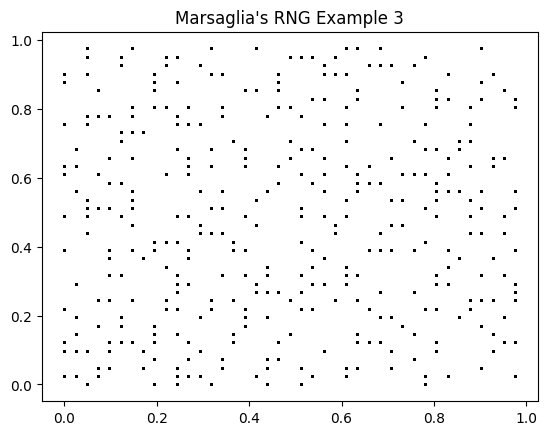

In [8]:
from BNumMet.Random import marsaglia_rand, clear_marsaglia_vars

clear_marsaglia_vars()
fail = [
    (
        marsaglia_rand(base=41, lag_r=2, lag_s=1, carry=0, seed_tuple=(0, 1)),
        marsaglia_rand(base=41, lag_r=2, lag_s=1, carry=0, seed_tuple=(0, 1)),
    )
    for i in range(100000)
]
plt.scatter(*zip(*fail), s=1, c="black")
plt.title("Marsaglia's RNG Example 3")
plt.show()

## Mersenne Twister Generator

### Example 1

In [9]:
from BNumMet.Random import clear_mt_vars, genrand

clear_mt_vars()
for i in range(10):
    print(genrand())

Initialized the global dictionary mtVars with seed 4357
0.8173300600185361
0.9990608997175147
0.5103543725587322
0.13153290984489324
0.03541634837990076
0.9924695345089932
0.6257087035630151
0.06259194576707482
0.4107105111262553
0.13477367491805314


### Example 2

Initialized the global dictionary mtVars with seed 4357


Text(0.5, 1.0, 'Mersenne Twister RNG')

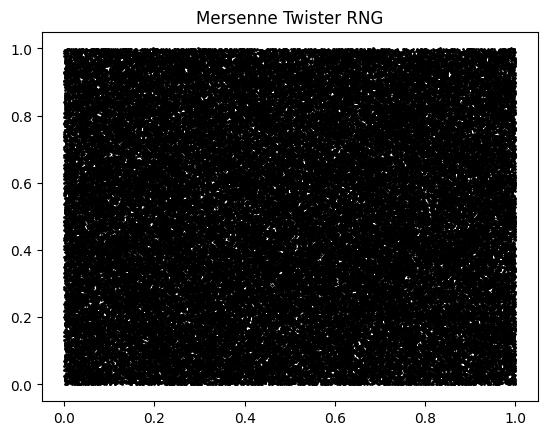

In [10]:
from BNumMet.Random import clear_mt_vars, genrand

clear_mt_vars()
toPlot = [(genrand(), genrand()) for i in range(100000)]
plt.scatter(*zip(*toPlot), s=1, c="black")
plt.title("Mersenne Twister RNG")
plt.show()

### Example 3: Tests

In [11]:
import numpy
from nistrng import *

clear_mt_vars()
# Test genrand from nistrng
sequence = numpy.array([genrand() * 0xFFFFFFFF for i in range(100)], dtype=numpy.uint64)


binary_sequence: numpy.ndarray = pack_sequence(sequence)

# Check the eligibility of the test and generate an eligible battery from the default NIST-sp800-22r1a battery
eligible_battery: dict = check_eligibility_all_battery(
    binary_sequence, SP800_22R1A_BATTERY
)
for i in eligible_battery:
    # print(i)
    ...

# Test the sequence on the eligible tests
results = run_all_battery(binary_sequence, eligible_battery, False)
# Print results one by one
for test, (res, _) in zip(eligible_battery, results):
    print(f"Test: {test} \n\tResult: {res.passed}")

Initialized the global dictionary mtVars with seed 4357
Test: monobit 
	Result: True
Test: frequency_within_block 
	Result: True
Test: runs 
	Result: True
Test: longest_run_ones_in_a_block 
	Result: True
Test: dft 
	Result: True
Test: non_overlapping_template_matching 
	Result: True
Test: serial 
	Result: True
Test: approximate_entropy 
	Result: True
Test: cumulative sums 
	Result: True
Test: random_excursion 
	Result: False
Test: random_excursion_variant 
	Result: True
